# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | budingen
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | srednekolymsk
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | rawlins
Processing Record 12 of Set 1 | vostok
Processing Record 13 of Set 1 | lukiv
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | alofi
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | cavite
Processing Record 19 of Set 1 | hofn
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | torbay
Processing Record 22 of Set 1 | katsuura
Processing Record 23 of S

Processing Record 39 of Set 4 | new norfolk
Processing Record 40 of Set 4 | los llanos de aridane
Processing Record 41 of Set 4 | mezen
Processing Record 42 of Set 4 | talnakh
Processing Record 43 of Set 4 | venado tuerto
Processing Record 44 of Set 4 | samusu
City not found. Skipping...
Processing Record 45 of Set 4 | aklavik
Processing Record 46 of Set 4 | hammerfest
Processing Record 47 of Set 4 | chengde
Processing Record 48 of Set 4 | sandnessjoen
Processing Record 49 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 0 of Set 5 | curuguaty
Processing Record 1 of Set 5 | gambela
Processing Record 2 of Set 5 | pacific grove
Processing Record 3 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 4 of Set 5 | rockland
Processing Record 5 of Set 5 | bambous virieux
Processing Record 6 of Set 5 | narsaq
Processing Record 7 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 5 | aflu
City not found. Skipping...
Proce

Processing Record 28 of Set 8 | pouembout
Processing Record 29 of Set 8 | zhanaozen
Processing Record 30 of Set 8 | vila franca do campo
Processing Record 31 of Set 8 | gat
Processing Record 32 of Set 8 | kankon
Processing Record 33 of Set 8 | amderma
City not found. Skipping...
Processing Record 34 of Set 8 | coari
Processing Record 35 of Set 8 | andenes
Processing Record 36 of Set 8 | toliary
City not found. Skipping...
Processing Record 37 of Set 8 | urumqi
Processing Record 38 of Set 8 | pangnirtung
Processing Record 39 of Set 8 | sao francisco
Processing Record 40 of Set 8 | washington
Processing Record 41 of Set 8 | mount isa
Processing Record 42 of Set 8 | iqaluit
Processing Record 43 of Set 8 | kusti
Processing Record 44 of Set 8 | havelock
Processing Record 45 of Set 8 | acapulco
Processing Record 46 of Set 8 | butembo
Processing Record 47 of Set 8 | san andres
Processing Record 48 of Set 8 | conakry
Processing Record 49 of Set 8 | harlingen
Processing Record 0 of Set 9 | tsih

Processing Record 15 of Set 12 | kushima
Processing Record 16 of Set 12 | netrakona
Processing Record 17 of Set 12 | boysun
Processing Record 18 of Set 12 | honavar
Processing Record 19 of Set 12 | hambantota
Processing Record 20 of Set 12 | mazabuka
Processing Record 21 of Set 12 | qaqortoq
Processing Record 22 of Set 12 | taywarah
Processing Record 23 of Set 12 | verkhnetulomskiy
Processing Record 24 of Set 12 | rawson
Processing Record 25 of Set 12 | ksenyevka
City not found. Skipping...
Processing Record 26 of Set 12 | bondoukou
Processing Record 27 of Set 12 | xam nua
Processing Record 28 of Set 12 | garowe
Processing Record 29 of Set 12 | necochea
Processing Record 30 of Set 12 | volkach
Processing Record 31 of Set 12 | nakhon thai
Processing Record 32 of Set 12 | sao sepe
Processing Record 33 of Set 12 | trincomalee
Processing Record 34 of Set 12 | manoharpur
Processing Record 35 of Set 12 | normandin
Processing Record 36 of Set 12 | severo-yeniseyskiy
Processing Record 37 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,budingen,50.3000,9.1167,-0.08,88,20,1.41,DE,1674945567
1,srednekolymsk,67.4500,153.6833,-30.43,99,100,1.27,RU,1674945568
2,rikitea,-23.1203,-134.9692,25.77,74,56,6.44,PF,1674945569
3,san patricio,28.0170,-97.5169,21.77,76,98,7.58,US,1674945570
4,hithadhoo,-0.6000,73.0833,27.28,77,30,5.19,MV,1674945473


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,budingen,50.3000,9.1167,-0.08,88,20,1.41,DE,1674945567
1,srednekolymsk,67.4500,153.6833,-30.43,99,100,1.27,RU,1674945568
2,rikitea,-23.1203,-134.9692,25.77,74,56,6.44,PF,1674945569
3,san patricio,28.0170,-97.5169,21.77,76,98,7.58,US,1674945570
4,hithadhoo,-0.6000,73.0833,27.28,77,30,5.19,MV,1674945473


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

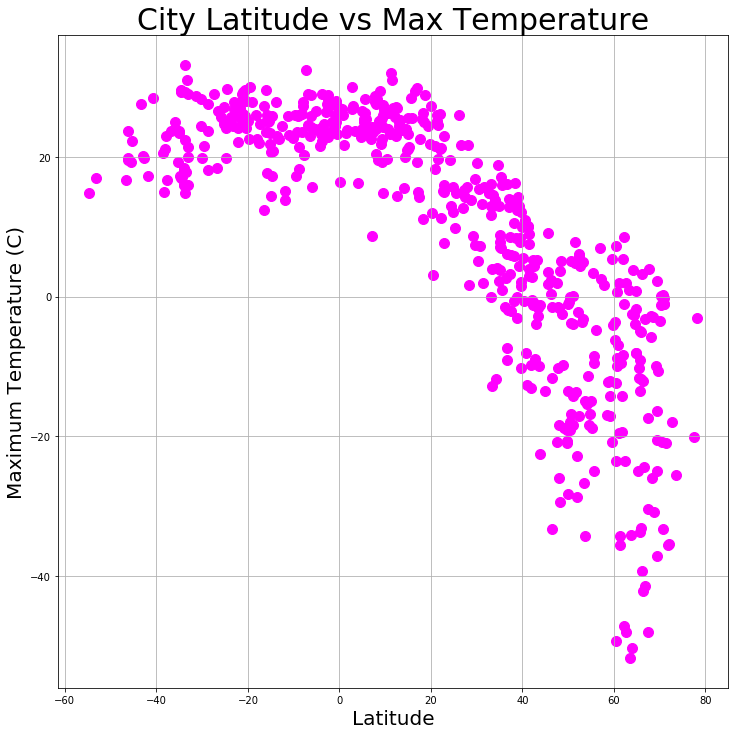

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(12,12), s=100, c='fuchsia')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature", fontsize = 30)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Maximum Temperature (C)", fontsize=20)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

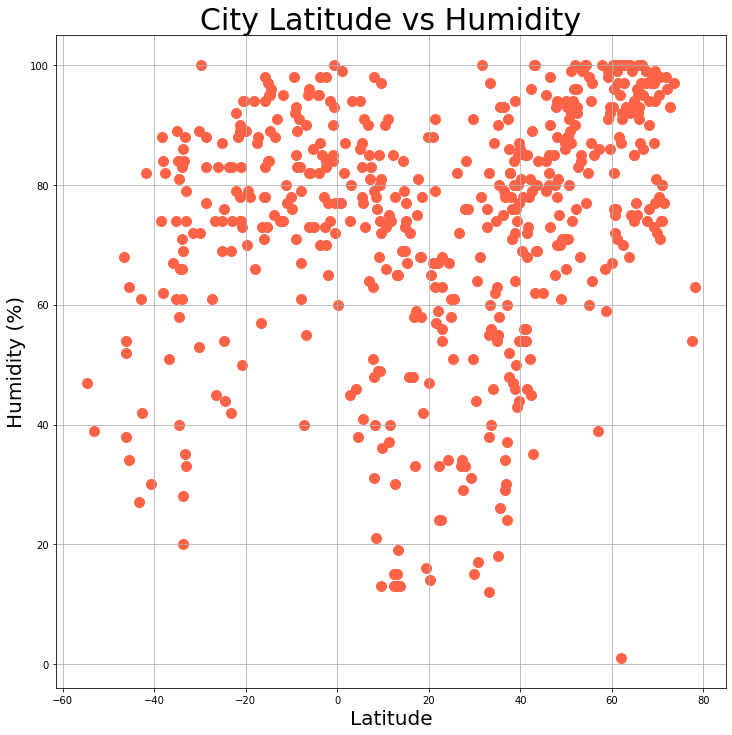

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(12,12), s=100, c='tomato')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity", fontsize = 30)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

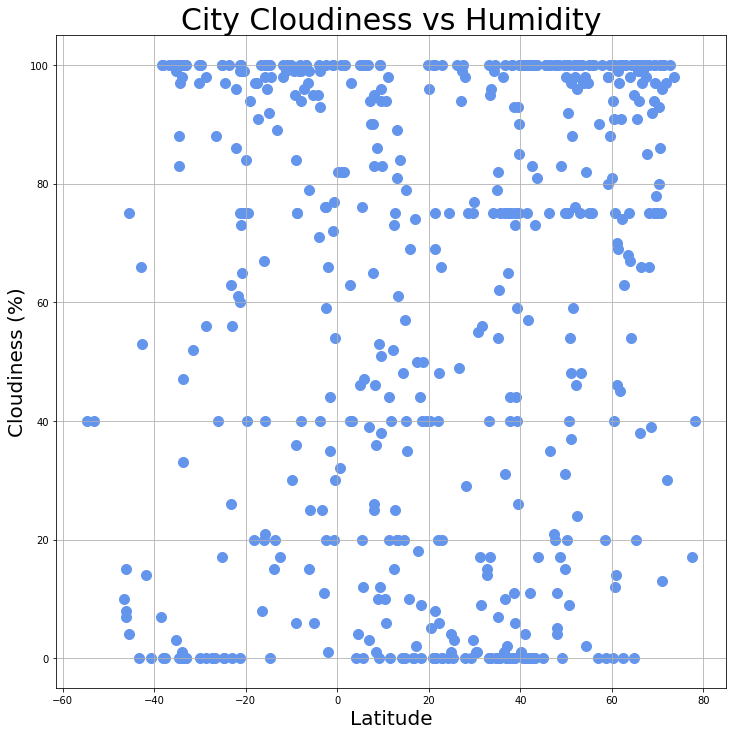

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(12,12), s=100, c='cornflowerblue')

# Incorporate the other graph properties
plt.title("City Cloudiness vs Humidity", fontsize = 30)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

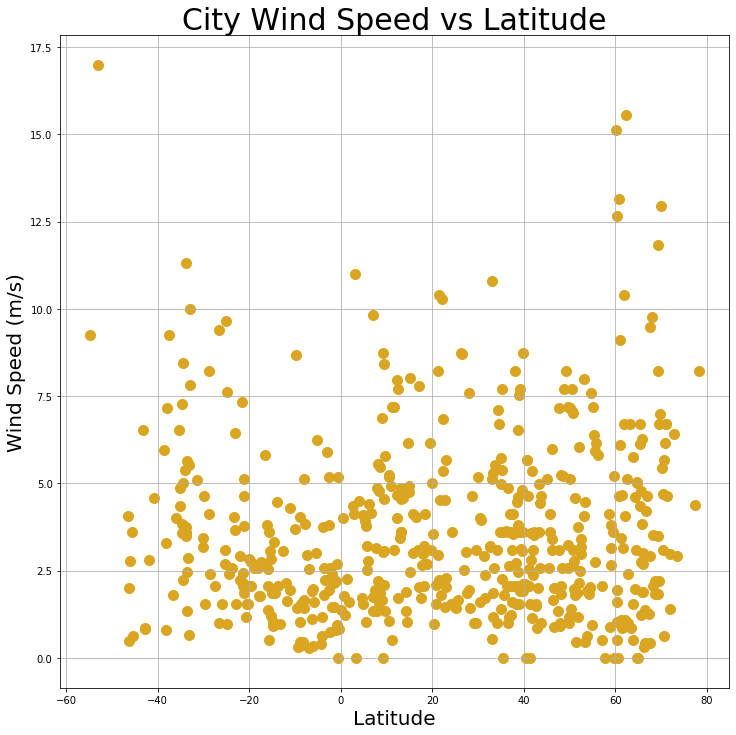

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(12,12), s=100, c='goldenrod')

# Incorporate the other graph properties
plt.title("City Wind Speed vs Latitude", fontsize = 30)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (m/s)", fontsize=20)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,budingen,50.3000,9.1167,-0.08,88,20,1.41,DE,1674945567
1,srednekolymsk,67.4500,153.6833,-30.43,99,100,1.27,RU,1674945568
3,san patricio,28.0170,-97.5169,21.77,76,98,7.58,US,1674945570
5,dikson,73.5069,80.5464,-25.54,97,98,2.92,RU,1674945571
6,hilo,19.7297,-155.0900,21.82,88,100,3.09,US,1674945571


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rikitea,-23.1203,-134.9692,25.77,74,56,6.44,PF,1674945569
4,hithadhoo,-0.6000,73.0833,27.28,77,30,5.19,MV,1674945473
7,mataura,-46.1927,168.8643,23.74,38,8,0.47,NZ,1674945572
13,alofi,-19.0595,-169.9187,27.94,78,94,2.57,NU,1674945575
15,bluff,-46.6000,168.3333,16.72,68,10,4.06,NZ,1674945576


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8155.


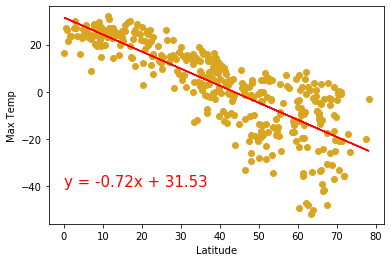

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

The r-value is: 0.2842.


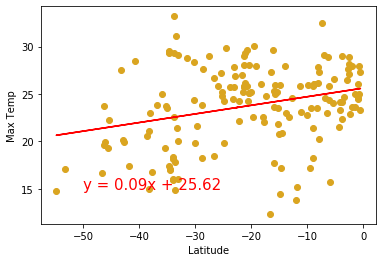

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4337.


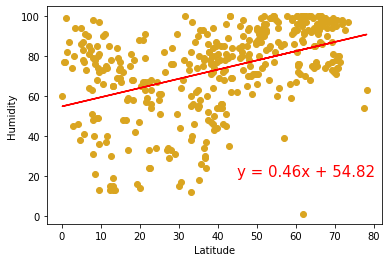

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

The r-value is: 0.4967.


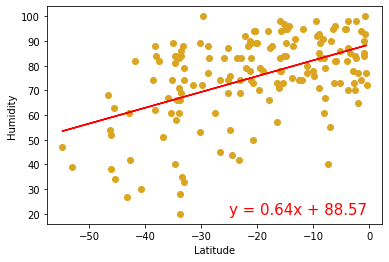

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.306.


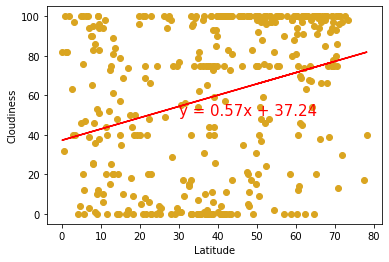

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

The r-value is: 0.22.


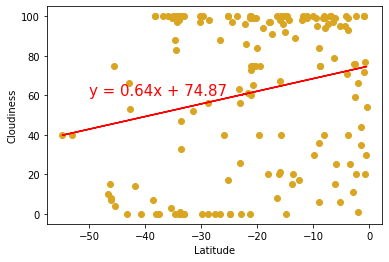

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0604.


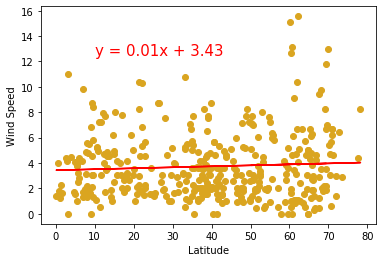

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,12.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

The r-value is: 0.3977.


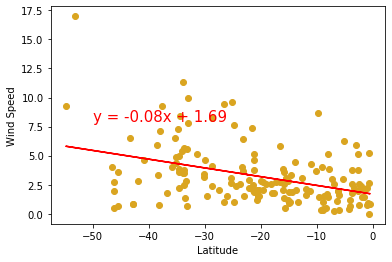

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

**Additional Analysis** 

In [23]:
# look at all correlations within the northern hemisphere dataframe
north_corr = northern_hemi_df.corr()
north_corr.unstack().sort_values()

Max Temp    Lat          -0.815507
Lat         Max Temp     -0.815507
Humidity    Max Temp     -0.470113
Max Temp    Humidity     -0.470113
Lng         Max Temp     -0.241894
Max Temp    Lng          -0.241894
Cloudiness  Max Temp     -0.237669
Max Temp    Cloudiness   -0.237669
Wind Speed  Lng          -0.151245
Lng         Wind Speed   -0.151245
Humidity    Wind Speed   -0.124140
Wind Speed  Humidity     -0.124140
Date        Lat          -0.042065
Lat         Date         -0.042065
Wind Speed  Date         -0.024954
Date        Wind Speed   -0.024954
Cloudiness  Date         -0.018138
Date        Cloudiness   -0.018138
Max Temp    Date         -0.017147
Date        Max Temp     -0.017147
Lng         Lat          -0.001210
Lat         Lng          -0.001210
Humidity    Date          0.010910
Date        Humidity      0.010910
Lng         Cloudiness    0.057049
Cloudiness  Lng           0.057049
Lat         Wind Speed    0.060407
Wind Speed  Lat           0.060407
Cloudiness  Wind Spe

In [24]:
south_corr = southern_hemi_df.corr()
south_corr.unstack().sort_values()

Wind Speed  Lat          -0.397710
Lat         Wind Speed   -0.397710
Wind Speed  Cloudiness   -0.297458
Cloudiness  Wind Speed   -0.297458
Humidity    Wind Speed   -0.251943
Wind Speed  Humidity     -0.251943
Date        Wind Speed   -0.243079
Wind Speed  Date         -0.243079
            Lng          -0.191652
Lng         Wind Speed   -0.191652
Wind Speed  Max Temp     -0.165060
Max Temp    Wind Speed   -0.165060
            Humidity     -0.158544
Humidity    Max Temp     -0.158544
Lat         Lng          -0.130664
Lng         Lat          -0.130664
Max Temp    Cloudiness   -0.053417
Cloudiness  Max Temp     -0.053417
Max Temp    Lng           0.025945
Lng         Max Temp      0.025945
            Humidity      0.033902
Humidity    Lng           0.033902
Date        Humidity      0.041373
Humidity    Date          0.041373
Lng         Date          0.075921
Date        Lng           0.075921
Max Temp    Date          0.107207
Date        Max Temp      0.107207
            Lat     